Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf.

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded.

Link to the github repository: <</insert link>>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# %matplotlib inline

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data = pd.read_csv('/content/drive/MyDrive/movie_metadata_cleaned.csv')

In [27]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


In [28]:
result = data[data['director_name'] == '0']

## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

director_name
Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         17
Spike Lee            16
Steven Soderbergh    16
Tim Burton           16
Renny Harlin         15
Oliver Stone         14
Name: count, dtype: int64


<ipython-input-29-bc869f52e405>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='director_name', y='gross', data=filtered_data, palette='viridis')


director_name
Steven Spielberg     4.114233e+09
Tim Burton           2.071275e+09
Clint Eastwood       1.378321e+09
Ridley Scott         1.337772e+09
Steven Soderbergh    1.050730e+09
Martin Scorsese      9.202871e+08
Oliver Stone         6.797927e+08
Renny Harlin         5.239759e+08
Spike Lee            3.285004e+08
Woody Allen          3.083454e+08
Name: gross, dtype: float64


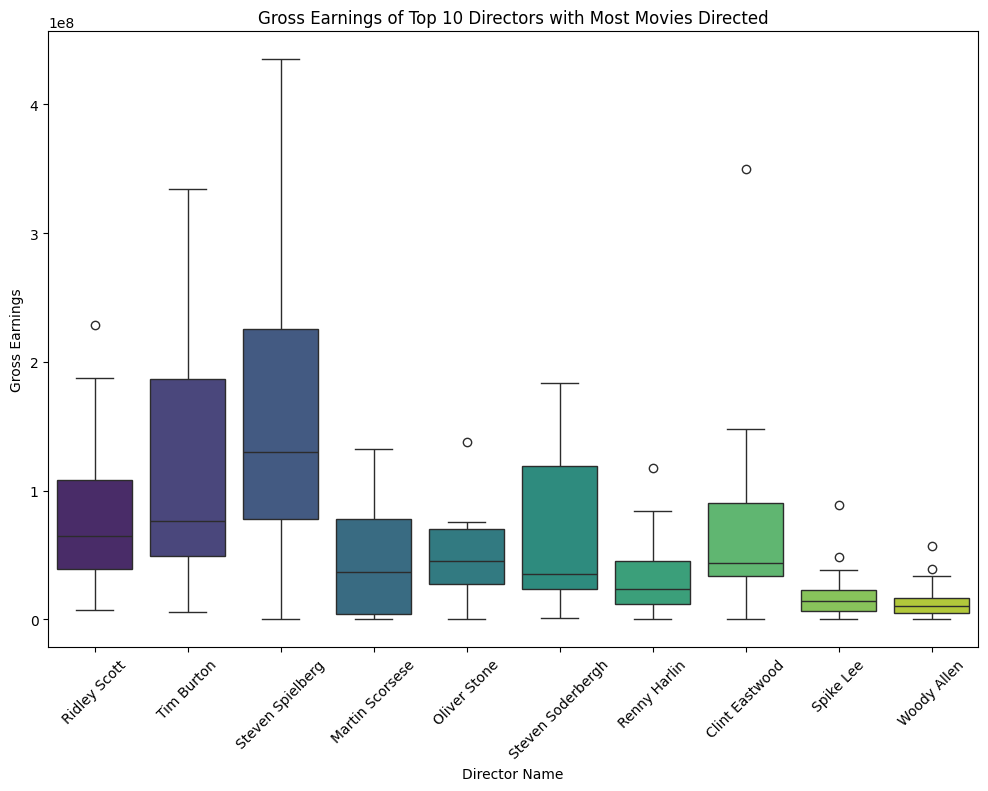

In [29]:

data['director_name'].replace([0, '0'], pd.NA, inplace=True)
data['gross'] = pd.to_numeric(data['gross'], errors='coerce')
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')

clean_data = data.dropna(subset=['director_name', 'gross', 'budget'])
clean_data = clean_data[(clean_data['gross'] > 0) | (clean_data['budget'] > 0)]

top_10 = clean_data['director_name'].value_counts()[:10]
print(top_10)

total_gross_by_director = clean_data.groupby('director_name')['gross'].sum().sort_values(ascending=False)

top_10_by_gross = total_gross_by_director[total_gross_by_director.index.isin(top_10.index)]
filtered_data = clean_data[clean_data['director_name'].isin(top_10_by_gross.index)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='director_name', y='gross', data=filtered_data, palette='viridis')
print(top_10_by_gross)

plt.xticks(rotation=45)
plt.title('Gross Earnings of Top 10 Directors with Most Movies Directed')
plt.xlabel('Director Name')
plt.ylabel('Gross Earnings')

plt.show()



## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

In [30]:
print(data.columns)

Index(['Unnamed: 0', 'movie_title', 'color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')


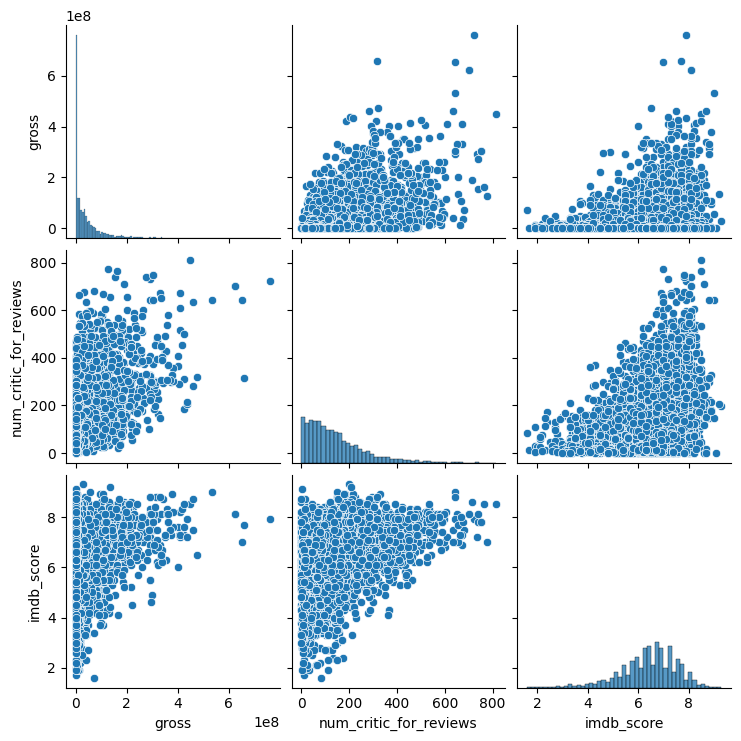

In [31]:
pair_data = clean_data[['gross', 'num_critic_for_reviews', 'imdb_score']]
sns.pairplot(pair_data)
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [32]:
clean_data['sales'] = clean_data['gross'] - data['budget']
display = clean_data[['movie_title','director_name','gross','budget','sales']].head(10)
print(display)

                                    movie_title      director_name  \
0                                     b'Avatar'      James Cameron   
1   b"Pirates of the Caribbean: At World's End"     Gore Verbinski   
2                                    b'Spectre'         Sam Mendes   
3                      b'The Dark Knight Rises'  Christopher Nolan   
5                                b'John Carter'     Andrew Stanton   
6                               b'Spider-Man 3'          Sam Raimi   
7                                    b'Tangled'       Nathan Greno   
8                    b'Avengers: Age of Ultron'        Joss Whedon   
9     b'Harry Potter and the Half-Blood Prince'        David Yates   
10        b'Batman v Superman: Dawn of Justice'        Zack Snyder   

          gross       budget        sales  
0   760505847.0  237000000.0  523505847.0  
1   309404152.0  300000000.0    9404152.0  
2   200074175.0  245000000.0  -44925825.0  
3   448130642.0  250000000.0  198130642.0  
5    7305

## Which directors garnered the most total sales?

In [33]:
total_sales_by_director = clean_data.groupby('director_name')['sales'].sum().sort_values(ascending=False)[:10]
print(total_sales_by_director)

director_name
Steven Spielberg     2.451332e+09
George Lucas         1.386641e+09
James Cameron        1.199626e+09
Joss Whedon          1.000887e+09
Chris Columbus       9.417076e+08
Peter Jackson        9.009693e+08
Tim Burton           8.242755e+08
Christopher Nolan    8.082276e+08
Jon Favreau          7.693815e+08
Francis Lawrence     7.555020e+08
Name: sales, dtype: float64


## Plot sales and average likes as a scatterplot. Fit it with a line.

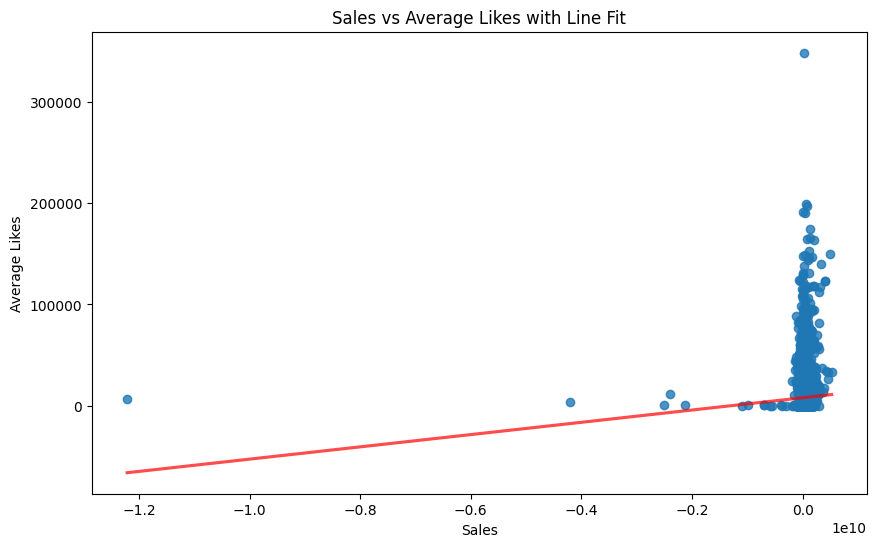

In [34]:
plt.figure(figsize=(10, 6))
sns.regplot(x='sales', y='movie_facebook_likes', data=clean_data, ci=None, line_kws={"color": "red", "alpha": 0.7})

plt.title('Sales vs Average Likes with Line Fit')
plt.xlabel('Sales')
plt.ylabel('Average Likes')

plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

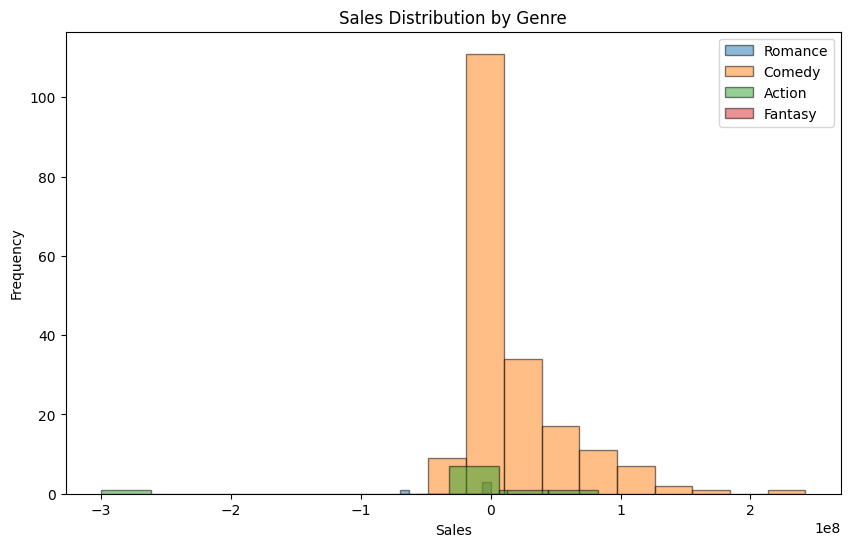

In [35]:
romance_sales = clean_data[clean_data['genres'] == 'Romance']['sales']
comedy_sales = clean_data[clean_data['genres'] == 'Comedy']['sales']
action_sales = clean_data[clean_data['genres'] == 'Action']['sales']
fantasy_sales = clean_data[clean_data['genres'] == 'Fantasy']['sales']

plt.figure(figsize=(10, 6))

plt.hist(romance_sales, bins=10, alpha=0.5, label='Romance', edgecolor='black')
plt.hist(comedy_sales, bins=10, alpha=0.5, label='Comedy', edgecolor='black')
plt.hist(action_sales, bins=10, alpha=0.5, label='Action', edgecolor='black')
plt.hist(fantasy_sales, bins=10, alpha=0.5, label='Fantasy', edgecolor='black')

plt.title('Sales Distribution by Genre')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [36]:
print(data.columns)

Index(['Unnamed: 0', 'movie_title', 'color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')


In [37]:

clean_data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1).astype(int)
display = clean_data[['movie_title','average_actor_likes']].head(10)

print(display)


                                    movie_title  average_actor_likes
0                                     b'Avatar'                  930
1   b"Pirates of the Caribbean: At World's End"                15333
2                                    b'Spectre'                 3851
3                      b'The Dark Knight Rises'                24333
5                                b'John Carter'                  600
6                               b'Spider-Man 3'                13000
7                                    b'Tangled'                  545
8                    b'Avengers: Age of Ultron'                22000
9     b'Harry Potter and the Half-Blood Prince'                15333
10        b'Batman v Superman: Dawn of Justice'                 7000


## Copying the whole dataframe

In [38]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


## Min-Max Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [39]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

print("Numeric columns:", numeric_columns)

for column in numeric_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)

print("Normalized Data:")
print(df)

Numeric columns: Index(['Unnamed: 0', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')
Normalized Data:
      Unnamed: 0                                        movie_title  color  \
0       0.000000                                          b'Avatar'  Color   
1       0.000198        b"Pirates of the Caribbean: At World's End"  Color   
2       0.000397                                         b'Spectre'  Color   
3       0.000595                           b'The Dark Knight Rises'  Color   
4       0.000793  b'Star Wars: Episode VII - The Force Awakens  ...      0   
...          ...                                                ...    ...   
5039    